In [1]:
# Importing dependency
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

pd.set_option('precision', 2)

# Data path, creating the model object and the name
data_path = '../../../input/Santos_Basin/Lake_PreSal_Santos_Basin_Well/v1.0.0/'
geo_model = gp.create_model('LakePreSal_Workflow_V1.2.0')

Not subsurface compatibility available


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
# Extension of the model, resolution of the model and the paths of surface and orientation
gp.init_data(geo_model,
             extent=[0, 4000, 0, 12000, -2000, 300],
             resolution=[250, 250, 200],
             path_i=data_path + "surfaces_points_2.csv",
             path_o=data_path + "orientations_points2.csv")

Active grids: ['regular']


LakePreSal_V6  2023-05-11 15:10

In [3]:
# If you want to check additional data of your model
geo_model.additional_data

values
Structure isLith                                           True
          isFault                                         False
          number faults                                       0
          number surfaces                                     4
          number series                                       2
          number surfaces per series                     [4, 0]
          len surfaces surface_points              [8, 8, 8, 3]
          len series surface_points                     [27, 0]
          len series orientations                        [2, 0]
Options   dtype                                         float64
          output                                        geology
          theano_optimizer                         fast_compile
          device                                            cpu
          verbosity                                        None
Kriging   range                                        12856.52
          $C_o$                                      3935476.19
          drift equations                                [3, 3]
Rescaling rescaling factor                                19900
          centers                      [2150.0, 6275.0, -465.0]

In [4]:
# All data imported (surface and orientation)
geo_model.get_data()

X      Y     Z    smooth  surface       G_x       G_y  \
surface_points 0   1200  11250     0  2.00e-06    ARIRI       NaN       NaN   
               3   1300   9000   100  2.00e-06    ARIRI       NaN       NaN   
               6   1200   4500     0  2.00e-06    ARIRI       NaN       NaN   
               9   1300   1300     0  2.00e-06    ARIRI       NaN       NaN   
               13  3100   9200     0  2.00e-06    ARIRI       NaN       NaN   
               17  2000   4500     0  2.00e-06    ARIRI       NaN       NaN   
               20  2200   4000     0  2.00e-06    ARIRI       NaN       NaN   
               23  3100   1300     0  2.00e-06    ARIRI       NaN       NaN   
               1   1200  11250   -60  2.00e-06      UBV       NaN       NaN   
               4   1300   9000     0  2.00e-06      UBV       NaN       NaN   
               7   1200   4500   -60  2.00e-06      UBV       NaN       NaN   
               10  1300   1300   -80  2.00e-06      UBV       NaN       NaN   
               14  3100   9200  -170  2.00e-06      UBV       NaN       NaN   
               18  2000   4500  -280  2.00e-06      UBV       NaN       NaN   
               21  2200   4000  -180  2.00e-06      UBV       NaN       NaN   
               24  3100   1300  -120  2.00e-06      UBV       NaN       NaN   
               2   1200  11250  -420  2.00e-06      LBV       NaN       NaN   
               5   1300   9000  -230  2.00e-06      LBV       NaN       NaN   
               8   1200   4500  -260  2.00e-06      LBV       NaN       NaN   
               11  1300   1300  -370  2.00e-06      LBV       NaN       NaN   
               15  3100   9200  -480  2.00e-06      LBV       NaN       NaN   
               19  2000   4500  -570  2.00e-06      LBV       NaN       NaN   
               22  2200   4000  -450  2.00e-06      LBV       NaN       NaN   
               25  3100   1300  -380  2.00e-06      LBV       NaN       NaN   
               12  1300   1300  -610  2.00e-06  ITAPEMA       NaN       NaN   
               16  3100   9200 -1030  2.00e-06  ITAPEMA       NaN       NaN   
               26  3100   1300  -750  2.00e-06  ITAPEMA       NaN       NaN   
orientations   0   1200  11250  -260  1.00e-02      UBV  1.00e-12  1.00e-12   
               1   1200  11250  -420  1.00e-02      LBV  1.00e-12  1.00e-12   

                   G_z  
surface_points 0   NaN  
               3   NaN  
               6   NaN  
               9   NaN  
               13  NaN  
               17  NaN  
               20  NaN  
               23  NaN  
               1   NaN  
               4   NaN  
               7   NaN  
               10  NaN  
               14  NaN  
               18  NaN  
               21  NaN  
               24  NaN  
               2   NaN  
               5   NaN  
               8   NaN  
               11  NaN  
               15  NaN  
               19  NaN  
               22  NaN  
               25  NaN  
               12  NaN  
               16  NaN  
               26  NaN  
orientations   0   1.0  
               1   1.0

In [5]:
# Surface points imported
gp.get_data(geo_model, 'surface_points').head()

,X,Y,Z,smooth,surface
0,1200,11250,0,2.00e-06,ARIRI
3,1300,9000,100,2.00e-06,ARIRI
6,1200,4500,0,2.00e-06,ARIRI
9,1300,1300,0,2.00e-06,ARIRI
13,3100,9200,0,2.00e-06,ARIRI


In [6]:
# Orientations imported
gp.get_data(geo_model, 'orientations').head()

,X,Y,Z,G_x,G_y,G_z,smooth,surface
0,1200,11250,-260,1.00e-12,1.00e-12,1.0,0.01,UBV
1,1200,11250,-420,1.00e-12,1.00e-12,1.0,0.01,LBV


In [7]:
# The series of the model
gp.get_data(geo_model, 'series')

,order_series,BottomRelation,isActive,isFault,isFinite
Default series,1,Erosion,True,False,False
Basement,2,Erosion,False,False,False


In [8]:
# The surfaces of the model
gp.get_data(geo_model, 'surfaces')

,surface,series,order_surfaces,color,id
0,ARIRI,Default series,1,#015482,1
1,UBV,Default series,2,#9f0052,2
2,LBV,Default series,3,#ffbe00,3
3,ITAPEMA,Default series,4,#728f02,4
4,basement,Basement,1,#443988,5


In [3]:
# To delete any surface points in the basement.
'''Sometimes this code is necessary, specially if you are interpolating bottoms'''
geo_model.delete_surface_points_basement()

True

In [4]:
# Sorting the surfaces and defining a serie for them (Stratigraphy - Top to Bottom)
gp.map_stack_to_surfaces(geo_model,                         
                         {"Strat_1_Series": ('ARIRI', 'UBV'),
                          "Strat_2_Series": ('LBV', 'ITAPEMA'),
                          "Basement_series": ('basement')})

# Ver o grid do modelo
geo_model.grid

Grid Object. Values: 
array([[ 8.00000e+00,  2.40000e+01, -1.99425e+03],
       [ 8.00000e+00,  2.40000e+01, -1.98275e+03],
       [ 8.00000e+00,  2.40000e+01, -1.97125e+03],
       ...,
       [ 3.99200e+03,  1.19760e+04,  2.71250e+02],
       [ 3.99200e+03,  1.19760e+04,  2.82750e+02],
       [ 3.99200e+03,  1.19760e+04,  2.94250e+02]])

In [11]:
# Checking the surfaces after the sorting and the series defined
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,ARIRI,Strat_1_Series,1,#015482,1
1,UBV,Strat_1_Series,2,#9f0052,2
2,LBV,Strat_2_Series,1,#ffbe00,3
3,ITAPEMA,Strat_2_Series,2,#728f02,4
4,basement,Basement_series,1,#443988,5


In [5]:
# Set a default orientation if the df is empty (OBS: Gempy need an orientation per series, even if its an arbitrary orientation)
geo_model.set_default_orientation()

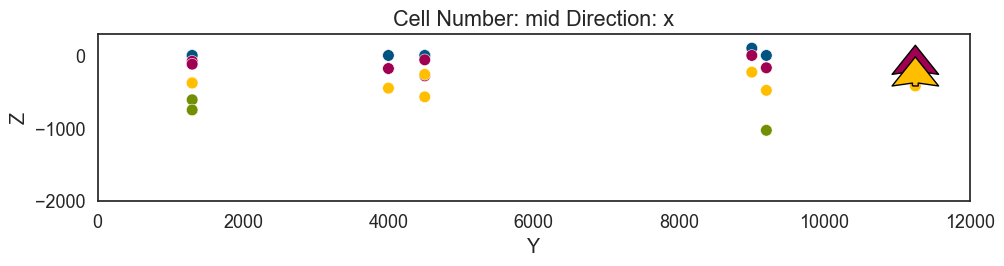

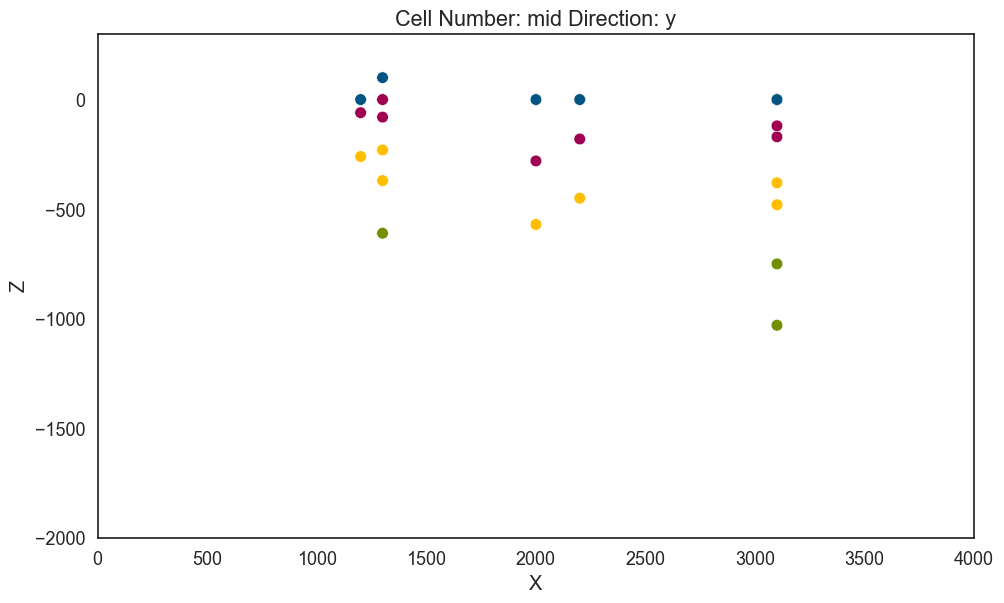

In [6]:
# Plot 2D of the data in X, Y and Z direction
gp.plot_2d(geo_model, direction=['x'], show_data=True, show_boundaries=True, legend=False, show=True)

gp.plot_2d(geo_model, direction=['y'], show_data=True, show_boundaries=True, legend=False, show=True)

#gp.plot_2d(geo_model, direction=['z'], show_data=True)

In [7]:
# Plot in 3D
gpv = gp.plot_3d(geo_model, plotter_type='basic', image=False, show_data=True, show_surfaces=True, show_scalar=True, show_boundaries=True)

[-160.  300.]
Active grids: ['regular' 'topography']


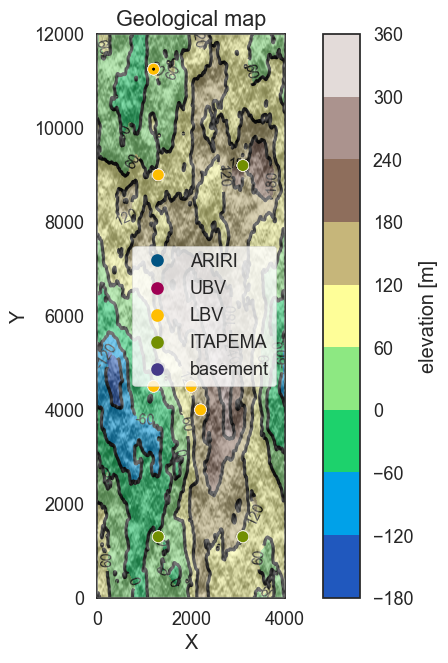

"\nOBS: Each time you run this code, a new topography will be generated randomly\nIf you liked a topography that was generated, you can use the following codes\n\n# To save the topography\ngeo_model._grid.topography.save('random_topo')\n# To load the topography\ngeo_model.set_topography(source='saved', filepath='random_topo.npy')\n\nIf you have a TIF file, you can import using the following code\ngeo_model.set_topography(source='gdal', filepath=your_path)\ngp.plot_2d(geo_model, show_topography=True, section_names=['topography'], show_lith=False,\n           show_boundaries=False,\n           kwargs_topography={'cmap': 'gray', 'norm': None}\n           )\nplt.show()\n"

In [17]:
# Add random topography
geo_model.set_topography(source='random')
gp.plot_2d(geo_model, show_topography=True, section_names=['topography'])
plt.show()

'''
OBS: Each time you run this code, a new topography will be generated randomly
If you liked a topography that was generated, you can use the following codes

# To save the topography
geo_model._grid.topography.save('random_topo')
# To load the topography
geo_model.set_topography(source='saved', filepath='random_topo.npy')

If you have a TIF file, you can import using the following code
geo_model.set_topography(source='gdal', filepath=your_path)
gp.plot_2d(geo_model, show_topography=True, section_names=['topography'], show_lith=False,
           show_boundaries=False,
           kwargs_topography={'cmap': 'gray', 'norm': None}
           )
plt.show()
'''

In [8]:
%%time
# Interpolating
gp.set_interpolator(geo_model,
                    theano_optimizer='fast_run',
                    compile_theano=True
                    )

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                      values
range              12856.52
$C_o$            3935476.19
drift equations   [3, 3, 3]
Wall time: 14.7 s


In [9]:
%%time
# Computing a solution for the model
sol = gp.compute_model(geo_model, compute_mesh=True)

Wall time: 1min 2s


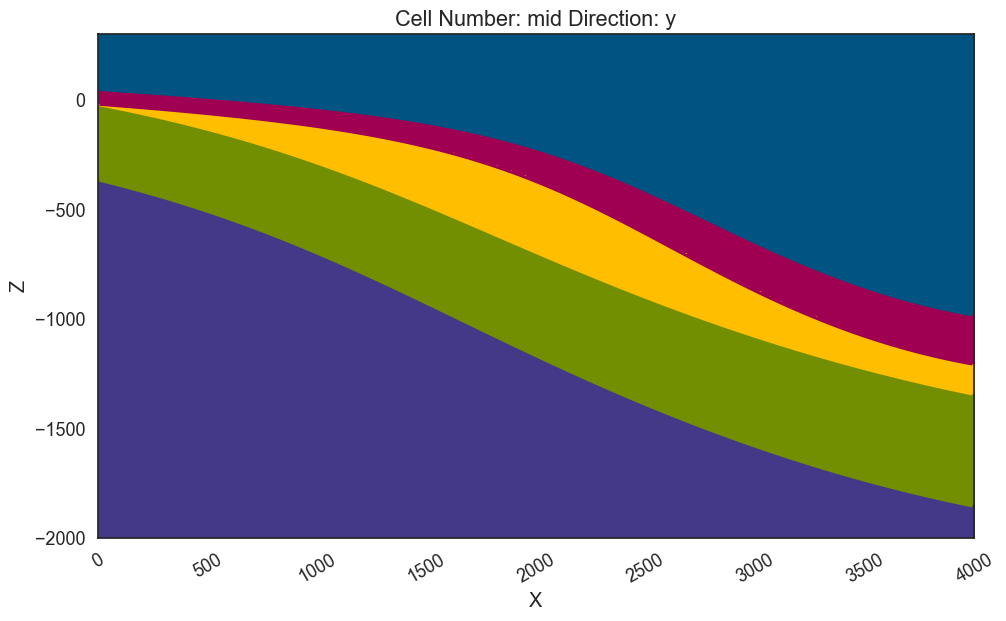

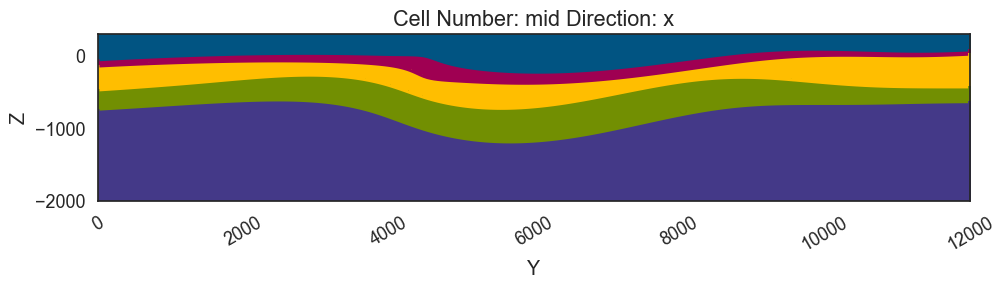

In [10]:
# Plot 2D of Y and X
gp.plot_2d(geo_model, direction="y", show_data=False, show_lith=True)
gp.plot_2d(geo_model, direction="x", show_data=False, show_lith=True)

In [11]:
# Plot 3D
ver, sim = gp.get_surfaces(geo_model)
gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic', show_data=True, show_results=True, show_lith=True, show_boundaries=True)

In [24]:
# Saving the model in a .zip file
'''
This code saves the model in a .zip file in 
the same folder that the .ipynb file is located
'''

#gp.save_model(geo_model, compress=True)

True